In [ ]:
!pip install deepface nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=061535cbe60f4a79bd2c5b9d7e2217997cff350d38ae39117ff380363d2f2c5c
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
import os
import csv
from deepface import DeepFace
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [ ]:
img_path = "/content/img1.jpg"
attributes = DeepFace.analyze(img_path, actions = ['age', 'gender', 'race', 'emotion'])
print(attributes)


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

24-10-12 10:37:43 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  0%|          | 524k/539M [00:00<03:13, 2.78MB/s]
  1%|          | 3.15M/539M [00:00<00:42, 12.7MB/s]
  2%|▏         | 11.0M/539M [00:00<00:20, 25.6MB/s]
  4%|▍         | 21.5M/539M [00:00<00:14, 36.2MB/s]
  6%|▌         | 32.0M/539M [00:00<00:11, 43.3MB/s]
  8%|▊         | 42.5M/539M [00:01<00:10, 46.5MB/s]
 10%|▉         | 53.0M/539M [00:01<00:10, 47.7MB/s]
 12%|█▏        | 63.4M/539M [00:01<00:09, 49.7MB/s]
 14%|█▎        | 73.9M/539M [00:01<00:09, 51.2MB/s]
 15%|█▌        | 83.4M/539M [00:01<00:07, 57.7MB/s]
 17%|█▋        | 89.7M/539M [00:01<00:07, 56.4MB/s]
 18%|█▊        | 95.9M/539M [00:02<00:08, 51.1MB/s]
 19%|█▉        | 105M/539M [00:02<00:07, 58.5MB/s] 
 21%|██        | 111M/539M [00:02<00:07, 57.0MB/s]
 22%|██▏       | 117M/539M [00:02<00:08, 52.1MB/s]
 23%|██▎       | 126M

24-10-12 10:37:59 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 524k/537M [00:00<02:20, 3.83MB/s]
  1%|          | 4.19M/537M [00:00<00:26, 20.5MB/s]
  2%|▏         | 11.0M/537M [00:00<00:17, 29.3MB/s]
  4%|▍         | 21.5M/537M [00:00<00:13, 37.3MB/s]
  6%|▌         | 32.0M/537M [00:00<00:12, 41.9MB/s]
  8%|▊         | 42.5M/537M [00:01<00:10, 46.9MB/s]
 10%|▉         | 53.0M/537M [00:01<00:09, 49.5MB/s]
 12%|█▏        | 63.4M/537M [00:01<00:09, 51.3MB/s]
 14%|█▍        | 73.9M/537M [00:01<00:08, 52.7MB/s]
 16%|█▌        | 83.9M/537M [00:01<00:07, 61.7MB/s]
 17%|█▋        | 90.7M/537M [00:01<00:07, 56.5MB/s]
 18%|█▊        | 97.0M/537M [00:02<00:08, 51.3MB/s]
 20%|█▉        | 105M/537M [00:02<00:08, 48.2MB/s] 
 22%|██▏       | 116M/537M [00:02<00:08, 50.3MB/s]
 24%|██▎       | 126M/537M [00:02<00:07, 51.7MB/s]
 25%|██▌       

24-10-12 10:38:14 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 524k/537M [00:00<02:43, 3.28MB/s]
  1%|          | 3.15M/537M [00:00<00:38, 13.9MB/s]
  2%|▏         | 11.0M/537M [00:00<00:19, 27.6MB/s]
  4%|▍         | 21.5M/537M [00:00<00:13, 38.2MB/s]
  6%|▌         | 32.0M/537M [00:00<00:11, 44.8MB/s]
  8%|▊         | 42.5M/537M [00:01<00:11, 42.6MB/s]
 10%|▉         | 53.0M/537M [00:01<00:10, 45.5MB/s]
 12%|█▏        | 63.4M/537M [00:01<00:09, 48.3MB/s]
 14%|█▍        | 73.9M/537M [00:01<00:09, 49.7MB/s]
 16%|█▌        | 84.4M/537M [00:01<00:08, 50.9MB/s]
 18%|█▊        | 94.9M/537M [00:02<00:08, 52.0MB/s]
 20%|█▉        | 105M/537M [00:02<00:07, 59.0MB/s] 
 21%|██        | 111M/537M [00:02<00:07, 57.0MB/s]
 22%|██▏       | 117M/537M [00:02<00:07, 52.8MB/s]
 24%|██▎       | 126M/537M [00:02<00:08, 51.1MB/s]
 25%|██▌  

24-10-12 10:38:29 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
  9%|▉         | 524k/5.98M [00:00<00:01, 3.56MB/s]
100%|██████████| 5.98M/5.98M [00:00<00:00, 21.6MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

[{'age': 34, 'region': {'x': 30, 'y': 83, 'w': 80, 'h': 80, 'left_eye': (86, 112), 'right_eye': (53, 113)}, 'face_confidence': 0.91, 'gender': {'Woman': 99.20479655265808, 'Man': 0.7952051237225533}, 'dominant_gender': 'Woman', 'race': {'asian': 37.067406598771015, 'indian': 13.97047424140419, 'black': 15.810262609139837, 'white': 2.6429187219094468, 'middle eastern': 1.3748069181923221, 'latino hispanic': 29.134132214434874}, 'dominant_race': 'asian', 'emotion': {'angry': 0.3845667699351907, 'disgust': 0.0016381631212425418, 'fear': 8.035501092672348, 'happy': 21.048185229301453, 'sad': 0.2553063677623868, 'surprise': 66.18857383728027, 'neutral': 4.086232557892799}, 'dominant_emotion': 'surprise'}, {'age': 27, 'region': {'x': 297, 'y': 145, 'w': 27, 'h': 27, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.95, 'gender': {'Woman': 49.545449018478394, 'Man': 50.454556941986084}, 'dominant_gender': 'Man', 'race': {'asian': 40.97720926864202, 'indian': 7.755237534954401, 'black

In [ ]:
print(attributes[0]["age"])
print(attributes[0]["gender"])
print(attributes[0]["dominant_race"])
print(attributes[0]["dominant_emotion"])

34
{'Woman': 99.20479655265808, 'Man': 0.7952051237225533}
asian
surprise


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
image_dir = '/content/images/'

img_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('jpg', 'jpeg', 'png'))]

data_rows = []

for img_path in img_paths:
    try:
        attributes = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])
        if attributes:
            age = attributes[0]['age']
            gender = "Woman" if attributes[0]['gender']['Woman'] > attributes[0]['gender']['Man'] else "Man"
            dominant_race = attributes[0]['dominant_race']
            dominant_emotion = attributes[0]['dominant_emotion']

            image_number = os.path.basename(img_path)
            data_rows.append([image_number, age, gender, dominant_race, dominant_emotion])
    except Exception as e:
        print(f"Error analyzing {img_path}: {e}")

csv_file = '/content/results1.csv'
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_number', 'age', 'gender', 'dominant_race', 'dominant_emotion'])
    writer.writerows(data_rows)

print(f"CSV file '{csv_file}' created successfully.")

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

CSV file '/content/results1.csv' created successfully.


In [ ]:


image_dir = '/content/images/'

# Get a list of all image files in the directory
img_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('jpg', 'jpeg', 'png'))]

# Create a list to store the data for the CSV
data_rows = []

for img_path in img_paths:
    try:
        attributes = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])
        if attributes:
            age = attributes[0]['age']
            gender = "Woman" if attributes[0]['gender']['Woman'] > attributes[0]['gender']['Man'] else "Man"
            dominant_race = attributes[0]['dominant_race']
            dominant_emotion = attributes[0]['dominant_emotion']

            image_number = os.path.basename(img_path)
            data_rows.append([image_number, age, gender, dominant_race, dominant_emotion])
    except Exception as e:
        print(f"Error analyzing {img_path}: {e}")

csv_file = '/content/results1.csv'
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_number', 'age', 'gender', 'dominant_race', 'dominant_emotion'])
    writer.writerows(data_rows)

print(f"CSV file '{csv_file}' created successfully.")


In [ ]:
def display_images(image_paths):
    """Display images based on the matched results."""
    num_images = len(image_paths)

    if num_images == 1:
        fig, ax = plt.subplots(figsize=(15, 5))
        axes = [ax]
    else:
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    fig.suptitle("Matched Images", fontsize=16)

    for ax, img_path in zip(axes, image_paths):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(os.path.basename(img_path))

    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()

In [ ]:
csv="/content/results1.csv"
import pandas as pd
df=pd.read_csv(csv)
df.head()

image_number  age gender dominant_race dominant_emotion
0   K93428.jpg   25    Man         black            happy
1   K92986.jpg   43    Man         white             fear
2   K93311.jpg   40    Man         black            happy
3   K93178.jpg   32    Man         black          neutral
4   K93060.jpg   35  Woman         white            happy

Enter a description of the person you're looking for (or 'quit' to exit): white woman 

Matched Images:
Image: K93060.jpg, Age: 35, Gender: Woman, Race: white, Emotion: happy
Image: K93533.jpg, Age: 47, Gender: Woman, Race: white, Emotion: happy
Image: K93500.jpg, Age: 32, Gender: Woman, Race: white, Emotion: neutral


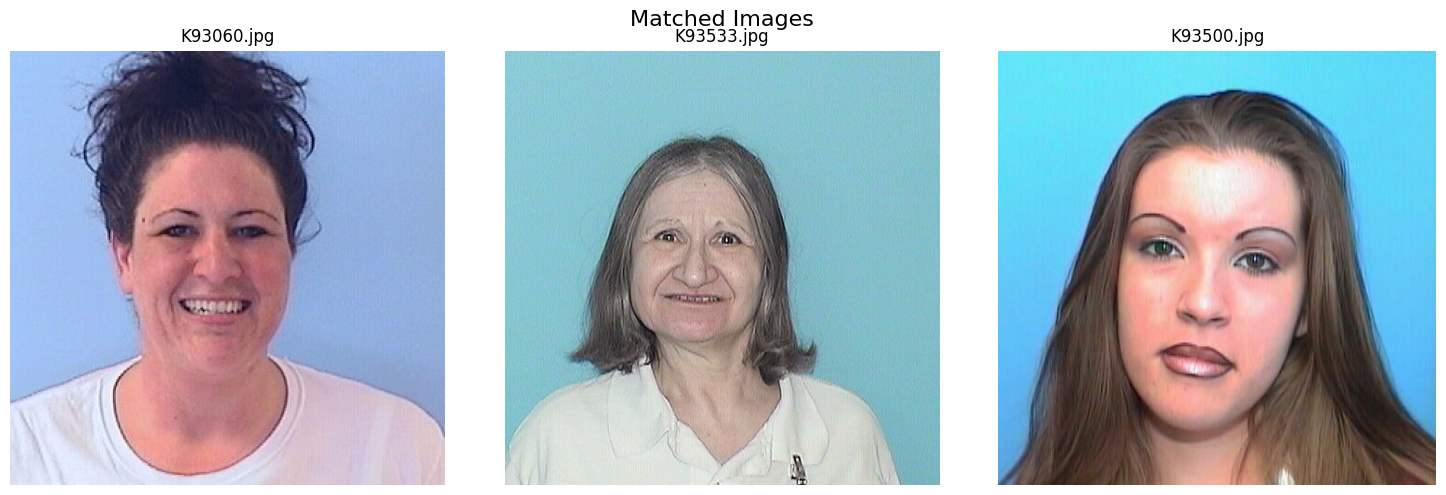

Enter a description of the person you're looking for (or 'quit' to exit): happy woman

Matched Images:
Image: K93060.jpg, Age: 35, Gender: Woman, Race: white, Emotion: happy
Image: K93533.jpg, Age: 47, Gender: Woman, Race: white, Emotion: happy
Image: K93569.jpg, Age: 36, Gender: Woman, Race: asian, Emotion: happy
Image: K93296.jpg, Age: 30, Gender: Woman, Race: black, Emotion: happy


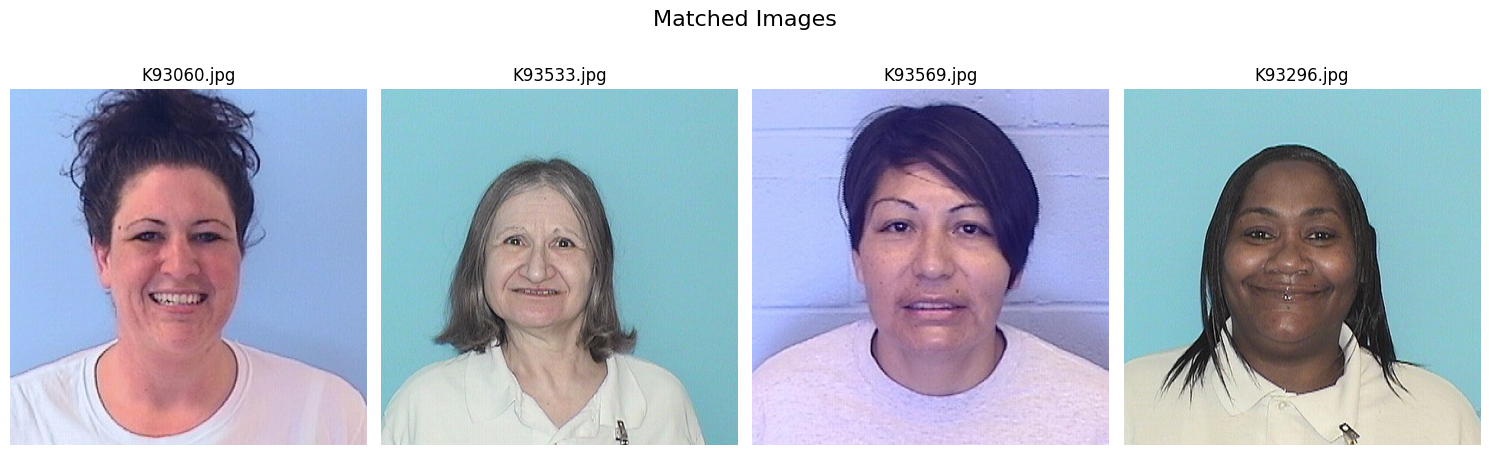

Enter a description of the person you're looking for (or 'quit' to exit): black woman

Matched Images:
Image: img3.jpg, Age: 34, Gender: Woman, Race: black, Emotion: neutral
Image: K93296.jpg, Age: 30, Gender: Woman, Race: black, Emotion: happy


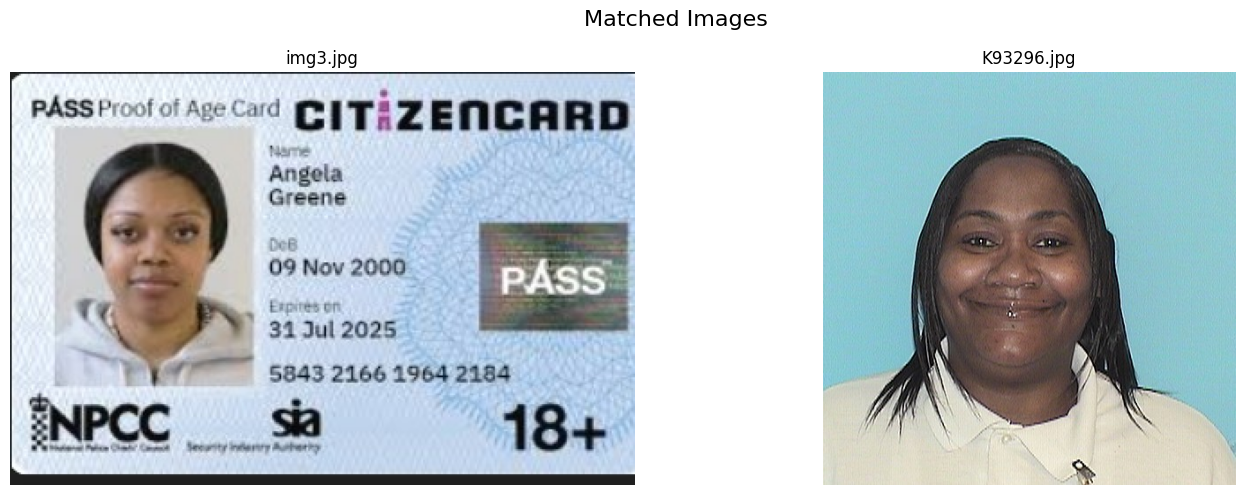

Enter a description of the person you're looking for (or 'quit' to exit): black happy woman with 25 years old
No matches found for the given description.
Enter a description of the person you're looking for (or 'quit' to exit): black happy woman more than 25 years old
No matches found for the given description.
Enter a description of the person you're looking for (or 'quit' to exit): happy woman with 25 years old
No matches found for the given description.
Enter a description of the person you're looking for (or 'quit' to exit): happy woman

Matched Images:
Image: K93060.jpg, Age: 35, Gender: Woman, Race: white, Emotion: happy
Image: K93533.jpg, Age: 47, Gender: Woman, Race: white, Emotion: happy
Image: K93569.jpg, Age: 36, Gender: Woman, Race: asian, Emotion: happy
Image: K93296.jpg, Age: 30, Gender: Woman, Race: black, Emotion: happy


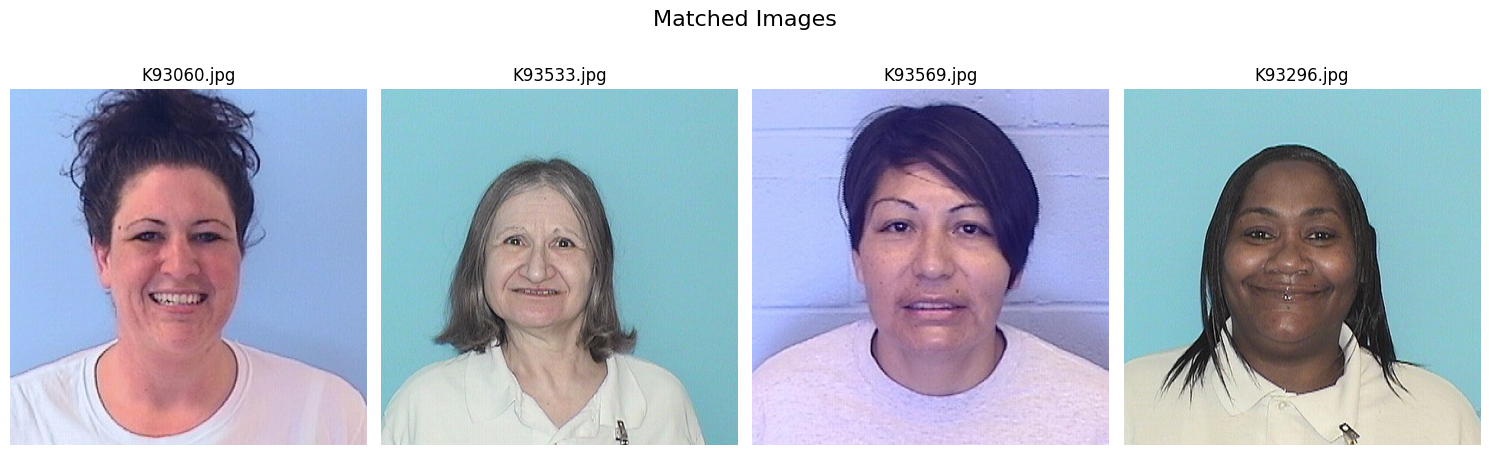

Enter a description of the person you're looking for (or 'quit' to exit): woman 35 years old
No matches found for the given description.


KeyboardInterrupt: Interrupted by user

In [ ]:
def clean_description(desc):
    """Clean the input description by removing extra spaces."""
    return re.sub(r"\s+", " ", desc).strip()

def tokenize_description(description):
    """Tokenize the input description into individual words."""
    cleaned_description = clean_description(description)
    return word_tokenize(cleaned_description)

def match_description_to_images(description, person_df):
    # Tokenize the description
    tokens = tokenize_description(description.lower())

    # Initialize filters
    filters = {
        'age': None,
        'gender': None,
        'race': None,
        'emotion': None
    }

    # Define keywords for filtering
    age_keywords = ['young', 'old', 'teenager', 'adult', 'elderly']
    gender_keywords = ['male', 'female', 'man', 'woman']
    race_keywords = ['white', 'black', 'asian', 'hispanic', 'indian']
    emotion_keywords = ['happy', 'sad', 'angry', 'surprised', 'neutral']

    # Check for keywords in the tokens and set filters
    for token in tokens:
        if token in age_keywords:
            filters['age'] = token
        elif token in gender_keywords:
            filters['gender'] = token
        elif token in race_keywords:
            filters['race'] = token
        elif token in emotion_keywords:
            filters['emotion'] = token

    filtered_df = person_df.copy()

    if filters['age']:
        filtered_df = filtered_df[filtered_df['age'].astype(str).str.contains(filters['age'], case=False)]

    if filters['gender']:
        filtered_df = filtered_df[filtered_df['gender'].str.lower() == filters['gender']]

    if filters['race']:
        filtered_df = filtered_df[filtered_df['dominant_race'].str.lower() == filters['race']]

    if filters['emotion']:
        filtered_df = filtered_df[filtered_df['dominant_emotion'].str.lower() == filters['emotion']]

    return filtered_df

# Main function to run the matching process
image_dir = '/content/images/'
csv_file = '/content/results1.csv'

# Load the CSV file into a DataFrame
person_df = pd.read_csv(csv_file)
def main():
    while True:
        description = input("Enter a description of the person you're looking for (or 'quit' to exit): ")
        if description.lower() == 'quit':
            print("Thank you for using the image search system. Goodbye!")
            break

        matched_images = match_description_to_images(description, person_df)

        if matched_images.empty:
            print("No matches found for the given description.")
        else:
            print("\nMatched Images:")
            image_paths = []
            for index, row in matched_images.iterrows():
                print(f"Image: {row['image_number']}, Age: {row['age']}, Gender: {row['gender']}, Race: {row['dominant_race']}, Emotion: {row['dominant_emotion']}")
                image_paths.append(os.path.join(image_dir, row['image_number']))

            display_images(image_paths)

# Run the main function
if __name__ == "__main__":
    main()

In [ ]:
csv="/content/results.csv"
import pandas as pd
df=pd.read_csv(csv)
df

image_number  age gender dominant_race dominant_emotion
0     img3.jpg   34  Woman         black          neutral
1     img1.jpg   34  Woman         asian         surprise
2     img2.jpg   27    Man         white            happy

In [ ]:
img1=DeepFace.extract_faces(img_path)

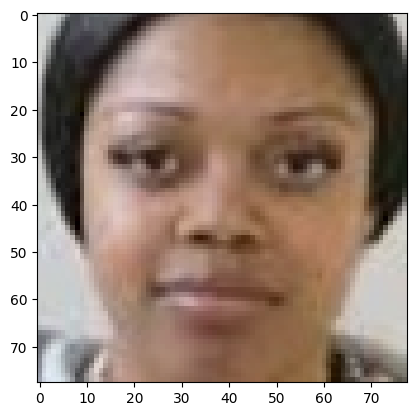

In [ ]:
import matplotlib.pyplot as plt
face_image = img1[0]['face']
plt.imshow(face_image)
plt.show()

In [ ]:
# prompt: write about this project a summary in details where the models used and the purpose and where can it be used

This project utilizes facial recognition and analysis techniques to search for images based on textual descriptions.  Here's a detailed breakdown:

**Purpose:** The primary goal is to build an image search system that can retrieve images of individuals matching a given textual description.  Instead of relying on traditional keyword searches, this project leverages the power of facial attributes (age, gender, race, and emotion) extracted from images.

**Models Used:**

1. **DeepFace:**  The core of this project is the DeepFace library, which is used for facial analysis. DeepFace employs pre-trained deep learning models to detect faces within images and extract attributes like age, gender, race, and emotion. These models are likely based on Convolutional Neural Networks (CNNs), which are well-suited for image analysis tasks.

2. **NLTK (Natural Language Toolkit):** NLTK is used for natural language processing tasks, specifically word tokenization. The project tokenizes the user's textual descriptions to extract keywords related to the desired facial attributes.

**Workflow:**

1. **Facial Analysis:** The project processes a set of images using DeepFace to extract the relevant facial attributes (age, gender, race, emotion) and stores these attributes in a CSV file.
2. **Description Input:** The user provides a textual description of the person they are looking for.
3. **Description Processing:** The system uses NLTK to tokenize the input description.  Then, it identifies keywords related to age, gender, race, and emotion within the tokens.
4. **Filtering:** Based on the extracted keywords, it filters the image data stored in the CSV file.  For example, if the description mentions "young woman," the system filters images with female gender and a relevant age range.
5. **Image Matching and Display:** The system displays the images that match the filtered criteria.

**Potential Use Cases:**

* **Law Enforcement:** Assisting in identifying suspects based on eyewitness descriptions.
* **Security Systems:** Recognizing individuals based on predefined criteria.
* **Social Media:** Advanced image search functionalities, going beyond simple keyword searches.
* **Human Resources:** Potentially automating image-based screening processes.
* **Content Moderation:** Identifying specific individuals based on image descriptions.
* **Personal Photo Management:** Finding specific people in a large photo library using more complex attributes than a name.

**Limitations and Future Improvements:**

* **Accuracy of DeepFace:** The accuracy of the DeepFace model is crucial.  Inaccurate facial attribute extraction could lead to poor search results.  The project could benefit from using more robust facial recognition models.
* **Keyword Matching:**  The current keyword matching is simple. A more sophisticated approach like semantic analysis or a more comprehensive keyword dictionary would improve the matching process.  The inclusion of additional facial features like hair color or glasses could improve results.
* **Error Handling:** The project includes error handling during image processing.  However, more robust error handling could be beneficial to accommodate diverse input data.
* **Scalability:** For very large image datasets, performance optimization will be necessary to maintain acceptable response times.
* **User Interface:** The current interface is through the command line.  A graphical user interface would greatly improve the usability.


This project demonstrates a functional approach to image search based on facial attributes and textual descriptions.  By addressing the noted limitations, the system's accuracy and capabilities could be significantly enhanced.
